In [5]:
from matplotlib import pyplot as plt
import numpy as np

import pandas as pd
import os

from taxumap.taxumap_base import Taxumap

%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
rel_abundances = pd.read_csv(os.path.join('microbiota_table.csv'))
rel_abundances['index_column'] = rel_abundances['index_column'].astype(int)
rel_abundances = rel_abundances.set_index('index_column')
rel_abundances

,Uniq1,Uniq10,Uniq100,Uniq10005,Uniq100070,Uniq100161,Uniq1003,Uniq100332,Uniq100353,Uniq100360,...,Uniq99523,Uniq99645,Uniq99650,Uniq99669,Uniq99681,Uniq99709,Uniq99780,Uniq99833,Uniq99884,Uniq99979
index_column,,,,,,,,,,,,,,,,,,,,,
66600164,0.670946,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66600169,0.612890,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66600209,0.001633,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66600224,0.006367,0.000000,0.000462,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000024
66600226,0.917854,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66704977,0.000000,0.809957,0.000027,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66704978,0.000000,0.929111,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66704990,0.000000,0.000000,0.000094,0.000000,0.0,0.0,0.003682,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000157


In [7]:
tax = pd.read_csv('taxonomy.csv').set_index('OTU')
tax

,Kingdom,Phylum,Class,Order,Family,Genus
OTU,,,,,,
Uniq114339,Bacteria,Firmicutes,unknown_Class_of_Firmicutes____Uniq5707,unknown_Order_of_unknown_Class_of_Firmicutes__...,unknown_Family_of_unknown_Order_of_unknown_Cla...,unknown_Genus_of_unknown_Family_of_unknown_Ord...
Uniq53046,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Veillonellaceae,Veillonella
Uniq5707,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Lachnospiraceae_FCS020_group
Uniq45364,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Escherichia-Shigella
Uniq80019,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Escherichia-Shigella
...,...,...,...,...,...,...
Uniq103183,Bacteria,Firmicutes,Bacilli,unknown_Order_of_Bacilli____Uniq45364,unknown_Family_of_unknown_Order_of_Bacilli____...,unknown_Genus_of_unknown_Family_of_unknown_Ord...
Uniq371,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Parabacteroides
Uniq75647,Bacteria,Proteobacteria,unknown_Class_of_Proteobacteria____Uniq5707,unknown_Order_of_unknown_Class_of_Proteobacter...,unknown_Family_of_unknown_Order_of_unknown_Cla...,unknown_Genus_of_unknown_Family_of_unknown_Ord...


transform_self:WARNING
Please set neigh parameter to approx. the size of individals in the dataset. See documentation.

transform_self:WARNING
Please set neigh parameter to approx. the size of individals in the dataset. See documentation.

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(<Figure size 1152x720 with 1 Axes>,
 <AxesSubplot:xlabel='taxumap-PF-1', ylabel='taxumap-PF-2'>)

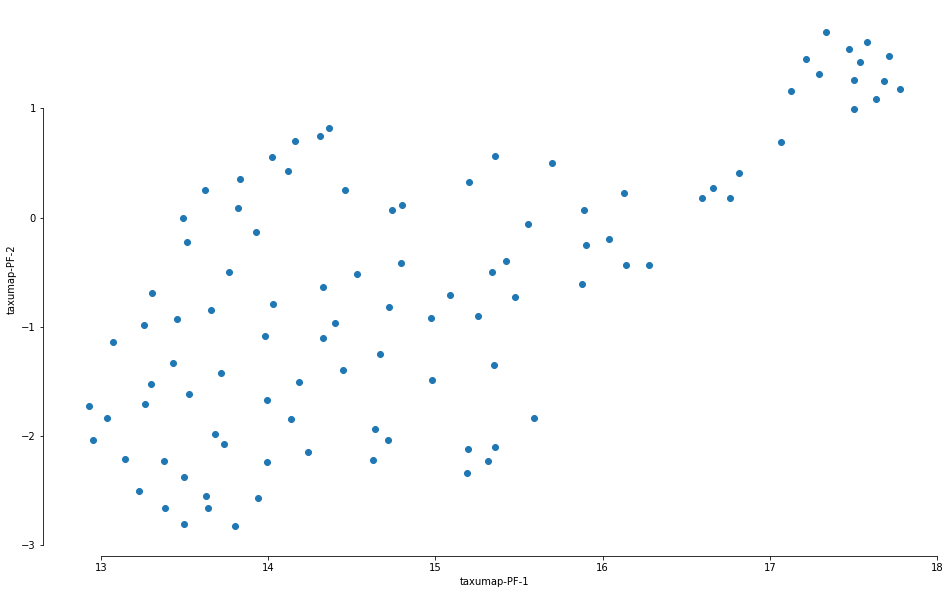

In [8]:
tu = Taxumap(taxonomy=tax, microbiota_data=rel_abundances)
tu.transform_self()
tu.scatter()

In [10]:
tu._is_transformed

True